# Exploratory Analysis


In [35]:
import os
import pandas as pd
from glob import glob
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [8]:
data_path = Path("eda_house_prices.ipynb").parent.parent.resolve().parent
data_path

WindowsPath('C:/Users/viniciushc/Git_Vinicius/House_Prices')

In [9]:
data_files = Path(data_path, "data").resolve()
[os.path.basename(file) for file in data_files.glob('*.csv')]

['sample_submission.csv', 'test.csv', 'train.csv']

In [10]:
os.path.abspath("train.csv")

'c:\\Users\\viniciushc\\Git_Vinicius\\House_Prices\\notebook\\train.csv'

# Loading data

In [11]:
df_train = pd.read_csv(os.path.join(data_path, "data", "train.csv"))
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [12]:
df_train.shape

(1460, 81)

# Renaming Columns

In [13]:
df_train.columns = map(str.lower, df_train.columns)

In [14]:
df_train.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [15]:
null_data = df_train.isnull()
null_data.count()

id               1460
mssubclass       1460
mszoning         1460
lotfrontage      1460
lotarea          1460
street           1460
alley            1460
lotshape         1460
landcontour      1460
utilities        1460
lotconfig        1460
landslope        1460
neighborhood     1460
condition1       1460
condition2       1460
bldgtype         1460
housestyle       1460
overallqual      1460
overallcond      1460
yearbuilt        1460
yearremodadd     1460
roofstyle        1460
roofmatl         1460
exterior1st      1460
exterior2nd      1460
masvnrtype       1460
masvnrarea       1460
exterqual        1460
extercond        1460
foundation       1460
bsmtqual         1460
bsmtcond         1460
bsmtexposure     1460
bsmtfintype1     1460
bsmtfinsf1       1460
bsmtfintype2     1460
bsmtfinsf2       1460
bsmtunfsf        1460
totalbsmtsf      1460
heating          1460
heatingqc        1460
centralair       1460
electrical       1460
1stflrsf         1460
2ndflrsf         1460
lowqualfin

In [16]:
not_null_data = df_train.notnull()
not_null_data.count()

id               1460
mssubclass       1460
mszoning         1460
lotfrontage      1460
lotarea          1460
street           1460
alley            1460
lotshape         1460
landcontour      1460
utilities        1460
lotconfig        1460
landslope        1460
neighborhood     1460
condition1       1460
condition2       1460
bldgtype         1460
housestyle       1460
overallqual      1460
overallcond      1460
yearbuilt        1460
yearremodadd     1460
roofstyle        1460
roofmatl         1460
exterior1st      1460
exterior2nd      1460
masvnrtype       1460
masvnrarea       1460
exterqual        1460
extercond        1460
foundation       1460
bsmtqual         1460
bsmtcond         1460
bsmtexposure     1460
bsmtfintype1     1460
bsmtfinsf1       1460
bsmtfintype2     1460
bsmtfinsf2       1460
bsmtunfsf        1460
totalbsmtsf      1460
heating          1460
heatingqc        1460
centralair       1460
electrical       1460
1stflrsf         1460
2ndflrsf         1460
lowqualfin

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [18]:
# square feet
lotarea = df_train['lotarea']

for square_feet in (lotarea.max(), lotarea.min(), lotarea.mean(), lotarea.median()):
    print(f"Max value for Lot Area = {square_feet:.2f}", end=f"{' > '*5:5}")
    print(f"Square Feets = {square_feet / 10.764:.2f}m²")

Max value for Lot Area = 215245.00 >  >  >  >  > Square Feets = 19996.75m²
Max value for Lot Area = 1300.00 >  >  >  >  > Square Feets = 120.77m²
Max value for Lot Area = 10516.83 >  >  >  >  > Square Feets = 977.04m²
Max value for Lot Area = 9478.50 >  >  >  >  > Square Feets = 880.57m²


In [19]:
df_mszoning = df_train.groupby('mszoning')
df_mszoning_desc = df_mszoning['saleprice'].describe()
df_mszoning_desc.round(2)

,count,mean,std,min,25%,50%,75%,max
mszoning,,,,,,,,
C (all),10.0,74528.00,33791.09,34900.0,43998.25,74700.0,98332.0,133900.0
FV,65.0,214014.06,52369.66,144152.0,174000.00,205950.0,250000.0,370878.0
RH,16.0,131558.38,35714.12,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1151.0,191004.99,80766.34,39300.0,137700.00,174000.0,224700.0,755000.0
RM,218.0,126316.83,48521.69,37900.0,100000.00,120500.0,140000.0,475000.0


In [20]:
df_train[['lotarea', 'saleprice']].aggregate(['min', 'mean', 'max']).round(2)

,lotarea,saleprice
min,1300.00,34900.0
mean,10516.83,180921.2
max,215245.00,755000.0


<AxesSubplot:>

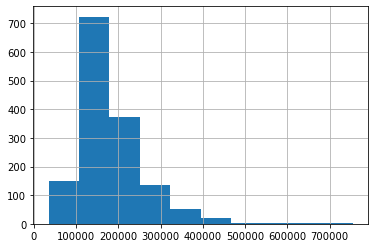

In [21]:
df_train['saleprice'].hist()

In [22]:
df_train[['lotarea', 'overallqual']].aggregate(['min', 'mean', 'max']).round(2)

,lotarea,overallqual
min,1300.00,1.0
mean,10516.83,6.1
max,215245.00,10.0


In [29]:
df_overal_quality_desc = df_train.groupby('overallqual')
df_overal_quality_desc = df_overal_quality_desc['saleprice'].describe()
df_overal_quality_desc.round(2)

,count,mean,std,min,25%,50%,75%,max
overallqual,,,,,,,,
1,2.0,50150.00,15344.22,39300.0,44725.0,50150.0,55575.0,61000.0
2,3.0,51770.33,14254.20,35311.0,47655.5,60000.0,60000.0,60000.0
3,20.0,87473.75,24688.57,37900.0,75500.0,86250.0,97500.0,139600.0
4,116.0,108420.66,29022.00,34900.0,88000.0,108000.0,125500.0,256000.0
5,397.0,133523.35,27107.33,55993.0,118000.0,133000.0,147000.0,228950.0
6,374.0,161603.03,36090.18,76000.0,139125.0,160000.0,181000.0,277000.0
7,319.0,207716.42,44466.26,82500.0,179470.0,200141.0,230750.0,383970.0
8,168.0,274735.54,63898.90,122000.0,234557.5,269750.0,306250.0,538000.0
9,43.0,367513.02,81278.17,239000.0,318980.5,345000.0,389716.0,611657.0


<AxesSubplot:>

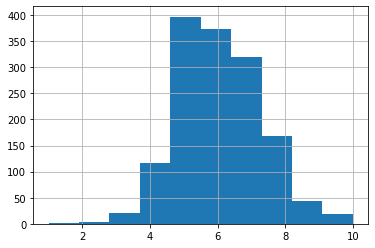

In [23]:
df_train['overallqual'].hist()

In [34]:
df_train[['overallqual', 'saleprice']].corr()

,overallqual,saleprice
overallqual,1.000000,0.790982
saleprice,0.790982,1.000000


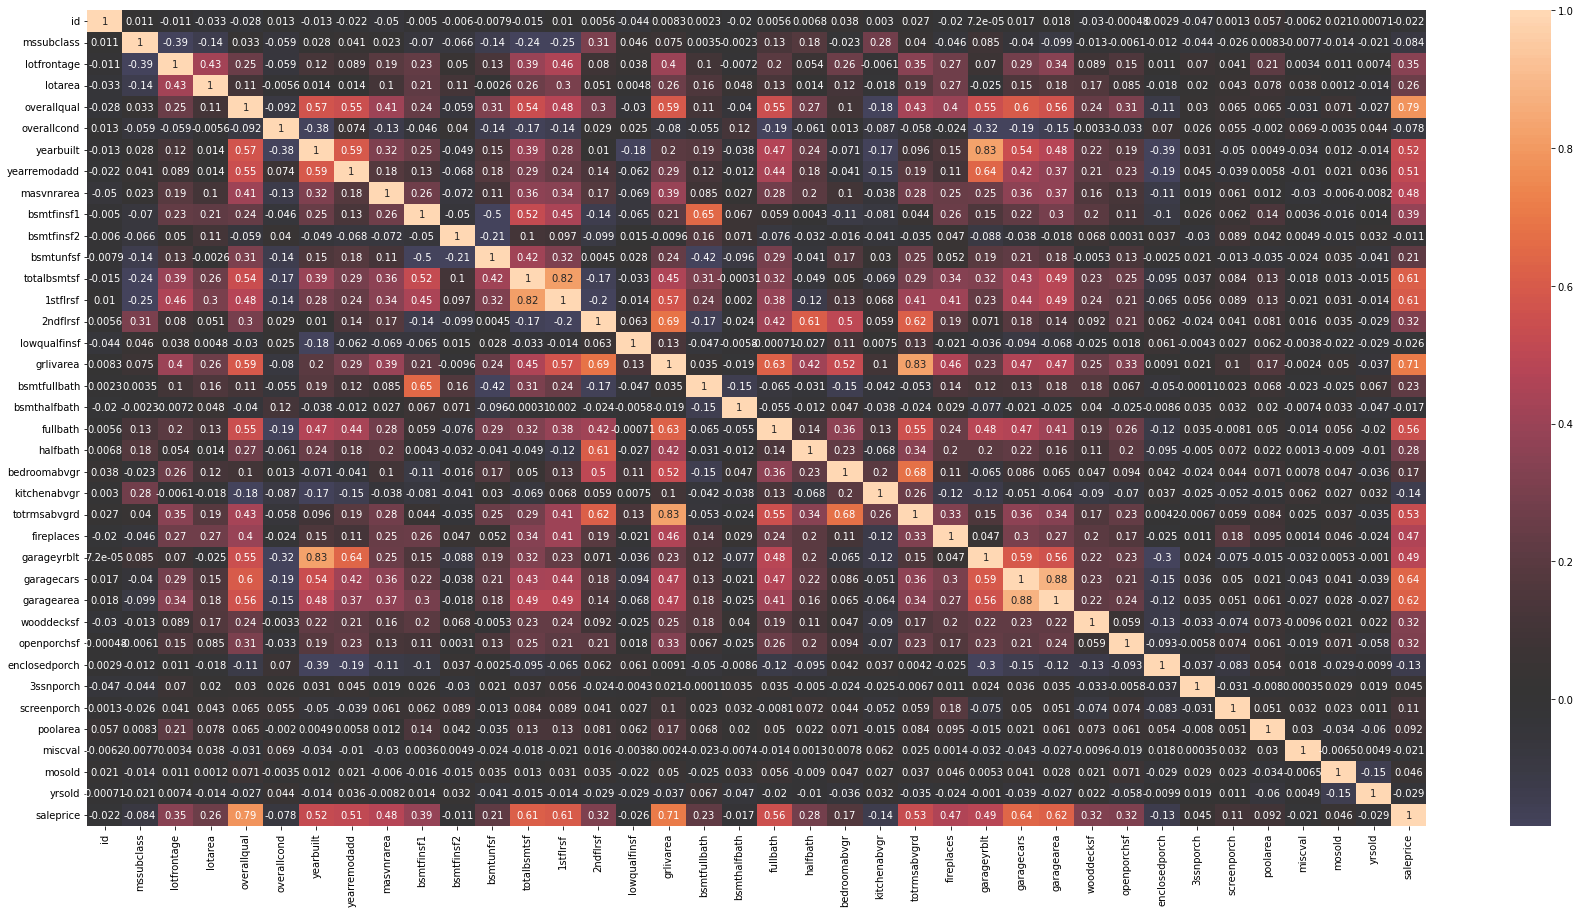

In [37]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_train.corr(), annot=True, center = 0.01, robust = True, linecolor = 'black', alpha = 0.9)
plt.show()